In [536]:
import pandas as pd
import matplotlib.pyplot as plt

In [537]:
df = pd.read_csv('/Users/guillermo/Downloads/Transplant___Recipient_Ethnicity_by_Organ.csv')


In [538]:
df.drop(['Unnamed: 1', 'Unknown', 'American Indian/Alaska Native', 'Pacific Islander'], axis=1, inplace = True)
df.rename(columns={"Unnamed: 0": "Organ"}, inplace = True)
df['White'] = df['White'].str.replace(',','').astype(int)
df['Black'] = df['Black'].str.replace(',','').astype(int)
df['Hispanic'] = df['Hispanic'].str.replace(',','').astype(int)
df['Asian'] = df['Asian'].str.replace(',','').astype(int)
df['Multiracial'] = df['Multiracial'].str.replace(',','').astype(int)
df['All Ethnicities'] = df['All Ethnicities'].str.replace(',', '').astype(int)
df.dtypes



Organ              object
All Ethnicities     int64
White               int64
Black               int64
Hispanic            int64
Asian               int64
Multiracial         int64
dtype: object

In [539]:
df2 = df[1:9]
df2.drop(['All Ethnicities'], axis=1, inplace = True)
df2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Organ,White,Black,Hispanic,Asian,Multiracial
1,Kidney,271416,121559,70767,24982,3353
2,Liver,132240,17079,24723,7476,1107
3,Pancreas,7722,670,534,60,23
4,Kidney / Pancreas,18550,4142,2318,368,107
5,Heart,57134,13800,6454,2066,485
6,Lung,36852,3584,2779,682,129
7,Heart / Lung,1043,134,126,47,6
8,Intestine,2181,501,417,60,22


<AxesSubplot:xlabel='Organ'>

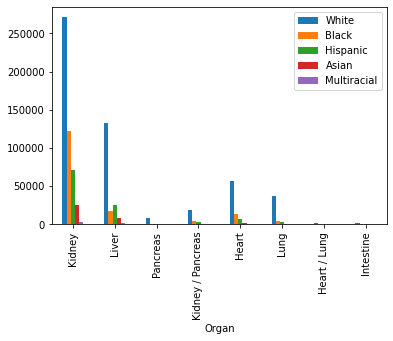

<Figure size 720x720 with 0 Axes>

In [540]:
fig1, ax = plt.subplots()
df2.plot.bar(x = 'Organ', ax = ax)
plt.figure(figsize=(10, 10))



In [541]:
df3 = pd.DataFrame(df[0:9])
df3['White'] = (df['White'] / df['All Ethnicities']) * 100
df3['Black'] = (df['Black'] / df['All Ethnicities']) * 100
df3['Hispanic'] = (df['Hispanic'] / df['All Ethnicities']) * 100
df3['Asian'] = (df['Asian'] / df['All Ethnicities']) * 100
df3['Multiracial'] = (df['Multiracial'] / df['All Ethnicities']) * 100
df3



,Organ,All Ethnicities,White,Black,Hispanic,Asian,Multiracial
0,All Organs,846715,62.262863,19.070526,12.769350,4.221373,0.618036
1,Kidney,498372,54.460523,24.391218,14.199634,5.012721,0.672791
2,Liver,184227,71.781009,9.270628,13.419857,4.058037,0.600889
3,Pancreas,9067,85.165987,7.389434,5.889489,0.661740,0.253667
4,Kidney / Pancreas,25658,72.297139,16.143113,9.034219,1.434251,0.417024
5,Heart,80487,70.985377,17.145626,8.018686,2.566874,0.602582
6,Lung,44212,83.352936,8.106396,6.285624,1.542568,0.291776
7,Heart / Lung,1371,76.075857,9.773888,9.190372,3.428155,0.437637
8,Intestine,3210,67.943925,15.607477,12.990654,1.869159,0.685358


In [542]:
df3.drop(['Organ', 'All Ethnicities'], axis = 1, inplace = True)
df4 = df3.loc[0,:]
perc_values = df3.loc[0,:].values
perc_values

array([62.26286295, 19.0705255 , 12.76934978,  4.22137319,  0.61803558])

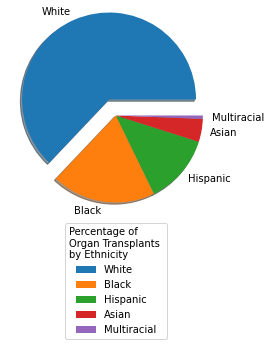

In [543]:
fig1, ax1 = plt.subplots()
my_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Multiracial']
my_explode = (0.2, 0, 0, 0, 0)
plt.pie(perc_values, labels = my_labels, explode = my_explode, shadow = True)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = 'Percentage of \nOrgan Transplants \nby Ethnicity')
plt.show()